# Regression Notebook

## Import libraries

In [1094]:
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from numpy.polynomial.polynomial import polyfit
from pandas import Series
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARMA
from statsmodels.compat import lzip

## Load data

In [60]:
!pwd

/Users/flatironschool/Documents/Mod_4_Project_Folder/mod_4_project


In [67]:
!ls

README.md                 combine_data.csv          mod_4_proj_notebook.ipynb


In [68]:
# https://www.kaggle.com/savvastj/nfl-combine-data

In [1252]:
combine_data = pd.read_csv('combine_data.csv')

In [1331]:
abcde.shape

(6218, 16)

## Get data ready

In [1253]:
combine_data.Pick.fillna(0,inplace=True)
combine_data = combine_data[combine_data.Pick>0]
combine_data.set_index('Player',inplace=True)

In [1256]:
#combine_data.drop(['Pfr_ID','AV','Team','Round','Year'],axis=1,inplace=True)

In [1255]:
combine_data.Forty.fillna(0,inplace=True)
combine_data = combine_data[combine_data.Forty>0]
combine_data.Vertical.fillna(0,inplace=True)
combine_data = combine_data[combine_data.Vertical>0]
combine_data.BenchReps.fillna(0,inplace=True)
combine_data = combine_data[combine_data.BenchReps>0]
combine_data.BroadJump.fillna(0,inplace=True)
combine_data = combine_data[combine_data.BroadJump>0]
combine_data.Cone.fillna(0,inplace=True)
combine_data = combine_data[combine_data.Cone>0]
combine_data.Shuttle.fillna(0,inplace=True)
combine_data = combine_data[combine_data.Shuttle>0]

In [1257]:
print(combine_data.shape)
combine_data.head()

(1822, 10)


,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Pick
Player,,,,,,,,,,
Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,188.0
Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,125.0
Rashidi Barnes,FS,72,208,4.62,35.0,10.0,114.0,6.92,4.32,225.0
David Barrett,CB,70,199,4.44,37.5,16.0,116.0,6.81,4.04,102.0
Rogers Beckett,FS,73,207,4.62,39.5,15.0,119.0,6.48,4.29,43.0


## Categorical features

In [1300]:
combine_data_cat = pd.get_dummies(combine_data.Pos)

In [1301]:
combine_data_cat.drop('C',axis=1,inplace=True)

In [1302]:
combine_data_cat.head(1)

,CB,DE,DT,FB,FS,ILB,LS,OG,OLB,OT,QB,RB,SS,TE,WR
Player,,,,,,,,,,,,,,,
Darnell Alford,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1303]:
combine_atg = combine_data.copy()
combine_atg.drop(['Pos'],axis=1,inplace=True)

In [1304]:
combine_atg = combine_atg[(np.abs(stats.zscore(combine_atg)) < 2.5).all(axis=1)]

In [1305]:
combine_atg['DE']=combine_data_cat['DE']
combine_atg['DT']=combine_data_cat['DT']
combine_atg['FB']=combine_data_cat['FB']
combine_atg['FS']=combine_data_cat['FS']
combine_atg['ILB']=combine_data_cat['ILB']
combine_atg['LS']=combine_data_cat['LS']
combine_atg['OG']=combine_data_cat['OG']
combine_atg['OT']=combine_data_cat['OT']
combine_atg['QB']=combine_data_cat['QB']
combine_atg['OLB']=combine_data_cat['OLB']
combine_atg['SS']=combine_data_cat['SS']
combine_atg['TE']=combine_data_cat['TE']
combine_atg['WR']=combine_data_cat['WR']

In [1306]:
print(combine_atg.shape)
combine_atg.head()

(1737, 22)


,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Pick,DE,...,FS,ILB,LS,OG,OT,QB,OLB,SS,TE,WR
Player,,,,,,,,,,,,,,,,,,,,,
Reggie Austin,69,175,4.44,35.0,17.0,119.0,7.03,4.14,125.0,0,...,0,0,0,0,0,0,0,0,0,0
Rashidi Barnes,72,208,4.62,35.0,10.0,114.0,6.92,4.32,225.0,0,...,1,0,0,0,0,0,0,0,0,0
David Barrett,70,199,4.44,37.5,16.0,116.0,6.81,4.04,102.0,0,...,0,0,0,0,0,0,0,0,0,0
Rogers Beckett,73,207,4.62,39.5,15.0,119.0,6.48,4.29,43.0,0,...,1,0,0,0,0,0,0,0,0,0
Brad Bedell,76,302,5.07,31.5,17.0,103.0,7.76,4.58,206.0,0,...,0,0,0,1,0,0,0,0,0,0


## Correlation

In [1310]:
combine_atg_num=combine_atg[['Ht','Wt','Forty','Vertical','BenchReps','BroadJump','Cone','Shuttle']]

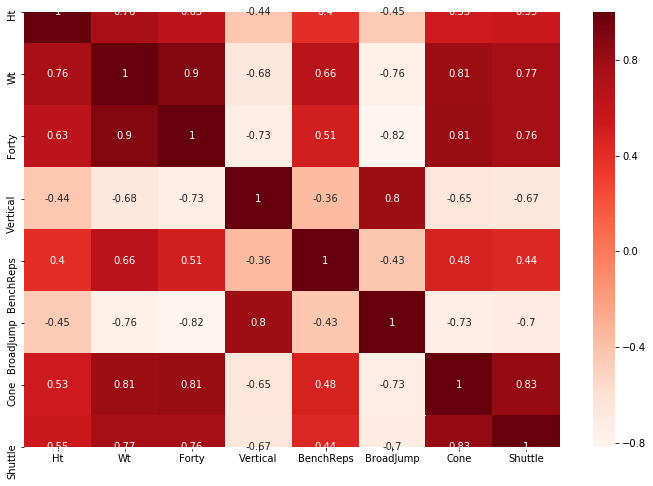

In [1329]:
plt.figure(figsize=(12,8))
cor = combine_atg_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [1319]:
combine_atg.drop('Wt',axis=1,inplace=True)
combine_atg.drop('Shuttle',axis=1,inplace=True)
combine_atg.drop('Cone',axis=1,inplace=True)
combine_atg.drop('BroadJump',axis=1,inplace=True)

In [1343]:
abs(combine_atg.corr()>=.8)

,Ht,Forty,Vertical,BenchReps,Pick,DE,DT,FB,FS,ILB,LS,OG,OT,QB,OLB,SS,TE,WR
Ht,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Forty,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Vertical,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BenchReps,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Pick,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
DE,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
DT,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
FB,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
FS,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
ILB,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


## Train - Test - Split

In [1267]:
df_features = combine_atg.drop('Pick',axis=1)

In [1268]:
df_target = combine_atg[['Pick']]

In [1269]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_target,test_size=0.3,random_state=45)

In [1270]:
print(X_train.shape[0]==y_train.shape[0])
print(X_test.shape[0]==y_test.shape[0])

True
True


## Check messy model

#### Using intercept

In [1271]:
lr = LinearRegression()
lr.fit(df_features, df_target)
y_hat_f = lr.predict(df_features)
print(f"r^2: {r2_score(df_target, y_hat_f)}")
print(f"rmse: {np.sqrt(mean_squared_error(df_target, y_hat_f))}")

r^2: 0.09611073568243089
rmse: 66.00447349797655


#### Not using intercept

In [1272]:
feat_mod=sm.OLS(df_target,df_features)
feat_results=feat_mod.fit()
feat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              329.5
Date:                Tue, 07 Jan 2020   Prob (F-statistic):                        0.00
Time:                        12:17:51   Log-Likelihood:                         -9743.9
No. Observations:                1737   AIC:                                  1.952e+04
Df Residuals:                    1720   BIC:                                  1.961e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht            -3.8976      0.761     -5.119      0.000      -5.391      -2.404
Forty         98.2945     10.062      9.769      0.000      78.560     118.029
Vertical      -0.7756      0.505     -1.536      0.125      -1.766       0.215
BenchReps     -1.7579      0.328     -5.358      0.000      -2.401      -1.114
DE             5.5118      6.454      0.854      0.393      -7.146      18.169
DT           -27.0569      7.554     -3.582      0.000     -41.872     -12.242
FB            51.6595     10.816      4.776      0.000      30.446      72.874
FS            12.9560      8.076      1.604      0.109      -2.884      28.796
ILB           14.7553      8.239      1.791      0.073      -1.404      30.915
LS            52.2410     66.559      0.785      0.433     -78.304     182.786
OG           -29.5464      8.659     -3.412      0.001     -46.530     -12.562
OT           -36.4131      7.565     -4.814      0.000     -51.250     -21.576
QB            15.4241     47.122      0.327      0.743     -76.998     107.846
OLB            9.9622      6.270      1.589      0.112      -2.335      22.260
SS            32.6560      8.897      3.670      0.000      15.206      50.106
TE            18.4051      7.496      2.455      0.014       3.702      33.108
WR            23.0972      6.848      3.373      0.001       9.665      36.529
==============================================================================
Omnibus:                      207.917   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.091
Skew:                           0.298   Prob(JB):                     1.10e-17
Kurtosis:                       2.149   Cond. No.                     3.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train data

In [1273]:
print(X_train.shape)
X_train.head()

(1215, 17)


,Ht,Forty,Vertical,BenchReps,DE,DT,FB,FS,ILB,LS,OG,OT,QB,OLB,SS,TE,WR
Player,,,,,,,,,,,,,,,,,
Lance Kendricks,75,4.65,34.5,25.0,0,0,0,0,0,0,0,0,0,0,0,1,0
Jonathan Allen,75,5.00,30.0,21.0,0,1,0,0,0,0,0,0,0,0,0,0,0
Kraig Urbik,77,5.25,24.0,29.0,0,0,0,0,0,0,1,0,0,0,0,0,0
Levine Toilolo,80,4.86,31.0,17.0,0,0,0,0,0,0,0,0,0,0,0,1,0
Tony Scheffler,77,4.54,33.5,17.0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1274]:
print('not normal: Wt, Ht, Forty, Cone')

not normal: Wt, Ht, Forty, Cone


#### Box-Cox: normalize

In [1275]:
X_train['Forty']=list(stats.boxcox(abs(X_train['Forty'])))[0]
X_train['Ht']=list(stats.boxcox(abs(X_train['Ht'])))[0]
#X_train['Cone']=list(stats.boxcox(abs(X_train['Cone'])))[0]
#X_train['Wt']=list(stats.boxcox(abs(X_train['Wt'])))[0]

#### Standard scale

In [1276]:
ss = StandardScaler()
ss.fit_transform(X_train[['Ht']]).flatten()
X_train['Ht'] = ss.fit_transform(X_train[['Ht']]).flatten()
ss.fit_transform(X_train[['Forty']]).flatten()
X_train['Forty'] = ss.fit_transform(X_train[['Forty']]).flatten()
ss.fit_transform(X_train[['Vertical']]).flatten()
X_train['Vertical'] = ss.fit_transform(X_train[['Vertical']]).flatten()
ss.fit_transform(X_train[['BenchReps']]).flatten()
X_train['BenchReps'] = ss.fit_transform(X_train[['BenchReps']]).flatten()

In [1277]:
print(X_train.shape)
X_train.head()

(1215, 17)


,Ht,Forty,Vertical,BenchReps,DE,DT,FB,FS,ILB,LS,OG,OT,QB,OLB,SS,TE,WR
Player,,,,,,,,,,,,,,,,,
Lance Kendricks,0.363813,-0.256900,0.310519,0.515523,0,0,0,0,0,0,0,0,0,0,0,1,0
Jonathan Allen,0.363813,0.895141,-0.796236,-0.115412,0,1,0,0,0,0,0,0,0,0,0,0,0
Kraig Urbik,1.161754,1.459443,-2.271908,1.146458,0,0,0,0,0,0,1,0,0,0,0,0,0
Levine Toilolo,2.419202,0.494904,-0.550290,-0.746347,0,0,0,0,0,0,0,0,0,0,0,1,0
Tony Scheffler,1.161754,-0.742000,0.064573,-0.746347,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1284]:
np.max(y_hat_tr)

212.83856838884088

### Score

#### Using Ridge regularization

In [1285]:
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train,y_train)
ridge_coef_tr = pd.DataFrame(ridge_reg.coef_)
ridge_coef_tr.columns=X_train.columns
print(ridge_reg.score(X_train,y_train))
ridge_coef_tr

0.12139675687584905


,Ht,Forty,Vertical,BenchReps,DE,DT,FB,FS,ILB,LS,OG,OT,QB,OLB,SS,TE,WR
0,-16.686727,31.851131,-5.387919,-11.800193,2.930182,-26.66846,47.035359,5.48962,6.715462,38.452396,-27.794416,-26.540779,7.001238,0.675481,39.01589,13.826338,26.20889


#### Using intercept

In [1286]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat_tr = lr.predict(X_train)
coef_df = pd.DataFrame(lr.coef_)
coef_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-16.68933,31.863926,-5.386578,-11.799089,2.941925,-26.679402,47.127239,5.515148,6.732726,40.380091,-27.816337,-26.551593,7.186149,0.690915,39.076906,13.850419,26.248267


In [1287]:
print(f"r^2: {r2_score(y_train, y_hat_tr)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_train, y_hat_tr))}")

r^2: 0.12139745597614948
rmse: 66.46112833677903


In [1288]:
X_int_train = sm.add_constant(X_train)
mod = sm.OLS(y_train,X_int_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pick   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     9.729
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           1.72e-24
Time:                        12:19:36   Log-Likelihood:                -6822.9
No. Observations:                1215   AIC:                         1.368e+04
Df Residuals:                    1197   BIC:                         1.377e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.8318      5.008     23.729      0.000     109.007     128.657
Ht           -16.6893      3.274     -5.098      0.000     -23.112     -10.266
Forty         31.8639      4.068      7.832      0.000      23.882      39.846
Vertical      -5.3866      2.935     -1.835      0.067     -11.145       0.372
BenchReps    -11.7991      2.512     -4.698      0.000     -16.727      -6.872
DE             2.9419      8.907      0.330      0.741     -14.533      20.417
DT           -26.6794      9.754     -2.735      0.006     -45.817      -7.542
FB            47.1272     13.383      3.521      0.000      20.870      73.385
FS             5.5151      9.591      0.575      0.565     -13.301      24.332
ILB            6.7327     10.184      0.661      0.509     -13.248      26.713
LS            40.3801     67.240      0.601      0.548     -91.541     172.301
OG           -27.8163     11.483     -2.422      0.016     -50.345      -5.288
OT           -26.5516     10.955     -2.424      0.016     -48.045      -5.058
QB             7.1861     47.668      0.151      0.880     -86.337     100.709
OLB            0.6909      7.738      0.089      0.929     -14.491      15.873
SS            39.0769     10.517      3.716      0.000      18.443      59.711
TE            13.8504     10.108      1.370      0.171      -5.981      33.682
WR            26.2483      8.360      3.140      0.002       9.846      42.651
==============================================================================
Omnibus:                      141.541   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.411
Skew:                           0.269   Prob(JB):                     6.86e-12
Kurtosis:                       2.148   Cond. No.                         57.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Not using intercept

In [1289]:
mod = sm.OLS(y_train,X_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.660
Model:                            OLS   Adj. R-squared (uncentered):              0.655
Method:                 Least Squares   F-statistic:                              136.9
Date:                Tue, 07 Jan 2020   Prob (F-statistic):                   4.37e-266
Time:                        12:19:40   Log-Likelihood:                         -7057.1
No. Observations:                1215   AIC:                                  1.415e+04
Df Residuals:                    1198   BIC:                                  1.423e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht           -48.8251      3.613    -13.514      0.000     -55.913     -41.737
Forty         13.9999      4.846      2.889      0.004       4.493      23.507
Vertical      -7.0999      3.556     -1.996      0.046     -14.077      -0.123
BenchReps    -21.1683      3.006     -7.041      0.000     -27.067     -15.270
DE           153.4985      7.577     20.259      0.000     138.633     168.364
DT           130.8205      8.664     15.100      0.000     113.823     147.818
FB           150.2354     15.343      9.792      0.000     120.133     180.338
FS            83.2712     10.925      7.622      0.000      61.837     104.706
ILB          118.4690     10.945     10.824      0.000      96.995     139.943
LS           168.1711     81.239      2.070      0.039       8.784     327.558
OG           144.4057     10.785     13.389      0.000     123.246     165.566
OT           164.1678      9.023     18.194      0.000     146.465     181.870
QB           135.0933     57.408      2.353      0.019      22.462     247.724
OLB          115.7383      7.310     15.833      0.000     101.396     130.080
SS           117.3393     12.105      9.694      0.000      93.590     141.088
TE           157.9777      9.793     16.131      0.000     138.764     177.192
WR            99.5339      9.417     10.570      0.000      81.059     118.009
==============================================================================
Omnibus:                       27.624   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.207
Skew:                           0.353   Prob(JB):                     7.50e-07
Kurtosis:                       2.758   Cond. No.                         56.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Repeat on test data

In [1290]:
print(X_test.shape)
X_test.head()

(522, 17)


,Ht,Forty,Vertical,BenchReps,DE,DT,FB,FS,ILB,LS,OG,OT,QB,OLB,SS,TE,WR
Player,,,,,,,,,,,,,,,,,
Rakeem Nunez-Roches,74,5.02,34.0,26.0,0,1,0,0,0,0,0,0,0,0,0,0,0
Will Davis-02,71,4.51,35.5,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0
Daryn Colledge,76,5.05,32.5,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0
Bashaud Breeland,71,4.62,34.5,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0
Al-Quadin Muhammad,75,4.88,30.5,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Box-Cox: normalize

In [1291]:
X_test['Forty']=list(stats.boxcox(abs(X_test['Forty'])))[0]
X_test['Ht']=list(stats.boxcox(abs(X_test['Ht'])))[0]

#### Standard scale

In [1292]:
ss = StandardScaler()
ss.fit_transform(X_test[['Ht']]).flatten()
X_test['Ht'] = ss.fit_transform(X_test[['Ht']]).flatten()
ss.fit_transform(X_test[['Forty']]).flatten()
X_test['Forty'] = ss.fit_transform(X_test[['Forty']]).flatten()
ss.fit_transform(X_test[['Vertical']]).flatten()
X_test['Vertical'] = ss.fit_transform(X_test[['Vertical']]).flatten()
ss.fit_transform(X_test[['BenchReps']]).flatten()
X_test['BenchReps'] = ss.fit_transform(X_test[['BenchReps']]).flatten()

In [1293]:
print(X_test.shape)
X_test.head()

(522, 17)


,Ht,Forty,Vertical,BenchReps,DE,DT,FB,FS,ILB,LS,OG,OT,QB,OLB,SS,TE,WR
Player,,,,,,,,,,,,,,,,,
Rakeem Nunez-Roches,-0.052873,0.991874,0.205579,0.801941,0,1,0,0,0,0,0,0,0,0,0,0,0
Will Davis-02,-1.162439,-0.863337,0.601077,-0.848092,0,0,0,0,0,0,0,0,0,0,0,0,0
Daryn Colledge,0.777277,1.070283,-0.189920,-0.023075,0,0,0,0,0,0,0,1,0,0,0,0,0
Bashaud Breeland,-1.162439,-0.361708,0.337411,-1.673108,0,0,0,0,0,0,0,0,0,0,0,0,0
Al-Quadin Muhammad,0.352761,0.588387,-0.717252,0.141928,1,0,0,0,0,0,0,0,0,0,0,0,0


### Score

#### Using Ridge regularization

In [1294]:
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train,y_train)
ridge_coef_tr = pd.DataFrame(ridge_reg.coef_)
ridge_coef_tr.columns=X_train.columns
print(ridge_reg.score(X_test,y_test))
ridge_coef_tr

0.037162053010370455


,Ht,Forty,Vertical,BenchReps,DE,DT,FB,FS,ILB,LS,OG,OT,QB,OLB,SS,TE,WR
0,-16.686727,31.851131,-5.387919,-11.800193,2.930182,-26.66846,47.035359,5.48962,6.715462,38.452396,-27.794416,-26.540779,7.001238,0.675481,39.01589,13.826338,26.20889


#### Using intercept

In [1295]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat_te = lr.predict(X_test)
coef_df = pd.DataFrame(lr.coef_)
coef_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-16.68933,31.863926,-5.386578,-11.799089,2.941925,-26.679402,47.127239,5.515148,6.732726,40.380091,-27.816337,-26.551593,7.186149,0.690915,39.076906,13.850419,26.248267


In [1296]:
print(f"r^2: {r2_score(y_test, y_hat_te)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_test, y_hat_te))}")

r^2: 0.037140296924815575
rmse: 64.51216019398451


#### Not using intercept

In [1297]:
mod = sm.OLS(y_test,X_test).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Pick   R-squared (uncentered):                   0.672
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              69.36
Date:                Tue, 07 Jan 2020   Prob (F-statistic):                   2.69e-112
Time:                        12:19:55   Log-Likelihood:                         -2997.1
No. Observations:                 522   AIC:                                      6024.
Df Residuals:                     507   BIC:                                      6088.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht           -41.8795      5.131     -8.162      0.000     -51.960     -31.799
Forty          5.6760      6.532      0.869      0.385      -7.156      18.508
Vertical      -4.4528      4.752     -0.937      0.349     -13.788       4.883
BenchReps    -17.3634      4.201     -4.133      0.000     -25.617      -9.110
DE           149.4000     10.628     14.057      0.000     128.519     170.281
DT           110.6997     13.785      8.031      0.000      83.618     137.782
FB           133.7927     20.873      6.410      0.000      92.784     174.802
FS           111.7519     16.548      6.753      0.000      79.241     144.262
ILB          120.6386     15.345      7.862      0.000      90.491     150.786
LS          5.772e-14   6.15e-15      9.391      0.000    4.56e-14    6.98e-14
OG           150.6328     14.935     10.086      0.000     121.290     179.976
OT           143.5048     13.341     10.757      0.000     117.294     169.716
QB          7.708e-14   4.96e-15     15.545      0.000    6.73e-14    8.68e-14
OLB          129.6308     11.275     11.497      0.000     107.479     151.783
SS            63.9338     19.297      3.313      0.001      26.021     101.847
TE           170.9751     12.598     13.572      0.000     146.225     195.725
WR            88.2899     13.122      6.729      0.000      62.510     114.069
==============================================================================
Omnibus:                       10.886   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.287
Skew:                           0.351   Prob(JB):                      0.00354
Kurtosis:                       2.836   Cond. No.                     8.59e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""